In [ ]:
# 2D array for image representation.
# white means, cell is active and black means cell is inactive.

#flatten the array. means convert to 1d array

In [ ]:
#IMPORTING DEPENDENCIES

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#LOADING THE DATASET

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#TOTAL TRAINING

len(X_train)

60000

In [ ]:
#TOTAL TEST DATA

len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
#2D ARRAY REPRESENTATION OF THE PIXEL GRID

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

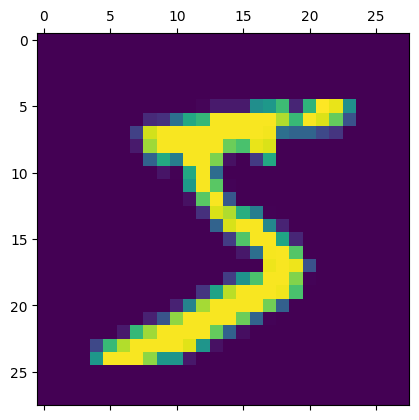

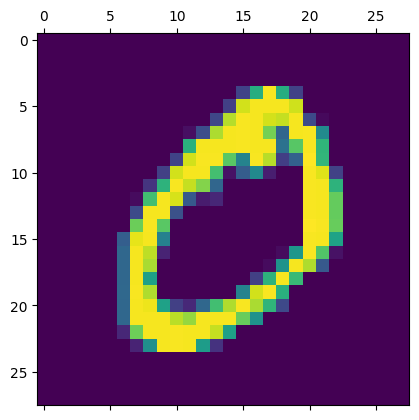

In [ ]:
#IMAGE/PIXEL GRID DISPLAY

plt.matshow(X_train[0])
plt.matshow(X_train[1])

In [ ]:
y_train[2]

4

In [ ]:
#FIRST 5 SAMPLES OF TRAINING DATA
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
#TRAINING DATA SIZE (28X28 PIXELS IMAGES, 60000 IN NUMBER)

X_train.shape

(60000, 28, 28)

In [ ]:
#SCALE THE VALUES --> TO IMPROVE LEARNING

X_train = X_train/255
X_test = X_test/255

In [ ]:
#FLATTENING THE DATA FROM 2D TO 1D ARRAY

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
#PRINTING FLATTENED DATA AND SAMPLE OF IT

print("TRAIN AFTER FLATTENENING: " , X_train_flattened.shape)
print("TEST AFTER FLATTENING: " , X_test_flattened.shape)

print(X_train_flattened[0])

TRAIN AFTER FLATTENENING:  (60000, 784)
TEST AFTER FLATTENING:  (10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.  

In [ ]:
#CREATING SIMPLE NEURAL NETWORK WITH INPUT LAYER 784 NUERONS AND OUTPUT WITH 9 NEURONS && W/O HIDDEN LAYER

#create a NN. stack 1 layer upon another.
#Dense means every neuron in layer "i" is connected to every other neuron in layer "j".
#here ip=784 neurons and op=10neurons

#building NN
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

#compiling NN
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#training takes place here
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4741 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9160
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9258


In [ ]:
#EVALUATING MODEL ON A TEST DATASET

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2674 - accuracy: 0.9267


[0.2674171030521393, 0.9266999959945679]

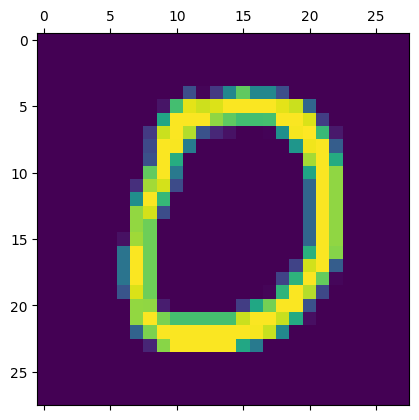

In [ ]:
#PREDICTING A TEST DATA

plt.matshow(X_test[10])

In [ ]:
#predicting a data, results in an array of 10 values (digit 0 -9)
y_predicted = model.predict(X_test_flattened)
y_predicted[10]

313/313 [==============================] - 1s 2ms/step


array([9.9854422e-01, 9.5908227e-08, 5.1634181e-01, 5.2336652e-02,
       8.8140965e-05, 7.9822123e-01, 3.0697068e-02, 2.2598029e-05,
       5.9243178e-01, 1.7608171e-04], dtype=float32)

In [ ]:
#use argmax to find and return the index of the maximum value of a numpy array
np.argmax(y_predicted[10])

0

In [ ]:
 #CHANGING TRUTH DATA TO NP ARGMAX()

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
#CREATING CONFUSION MATRIX

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 963    0    2    2    0    5    5    2    1    0]
 [   0 1114    3    2    0    1    4    2    9    0]
 [   7    9  933   12    8    4   12   11   34    2]
 [   4    0   24  912    0   26    2   12   25    5]
 [   2    1    7    1  917    0    9    5   11   29]
 [   9    3    5   32    8  780   11    7   31    6]
 [  12    3    9    1    7   14  908    2    2    0]
 [   1    6   24    4    5    0    0  963    2   23]
 [   7    8    9   17    9   25    9   13  873    4]
 [  11    7    1   10   26    6    0   33   11  904]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

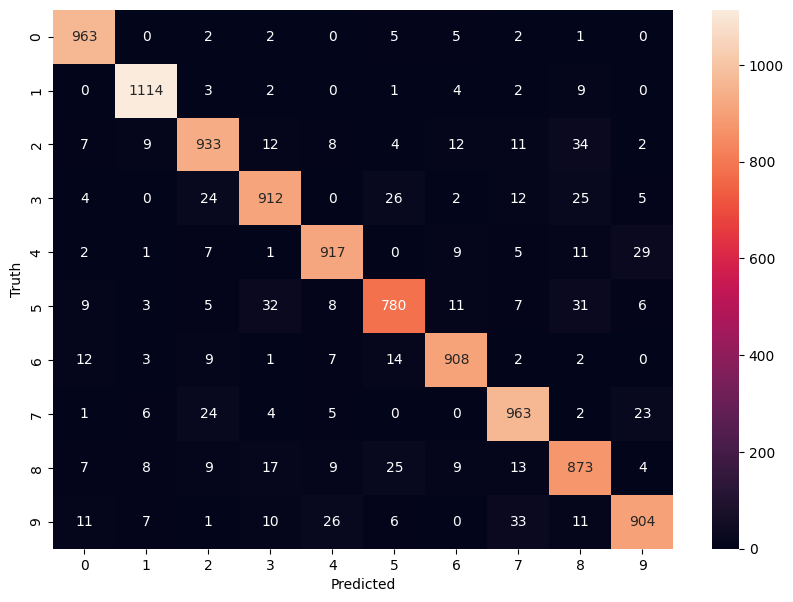

In [ ]:
#CONFUSION MATRIX VISUALIZATION

import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#963 times truth val=0, model val=0
#1114 times truthval=1 and modelval=1
#9 times truthval=2, but modelval=1
#anything not in diagonals indicate the num of error predictions

In [ ]:
#CREATING SIMPLE NEURAL NETWORK WITH INPUT LAYER 784 NUERONS AND OUTPUT WITH 9 NEURONS && WITH HIDDEN LAYERS

#create a NN. stack 1 layer upon another.
#Dense means every neuron in layer "i" is connected to every other neuron in layer "j".
#here ip=784 neurons and op=10neurons
#100 neurons in hiddenlayer1

#building NN
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#compiling NN
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#training takes place here
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2718 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9840


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0748 - accuracy: 0.9775


[0.07483654469251633, 0.9775000214576721]

Text(95.72222222222221, 0.5, 'Truth')

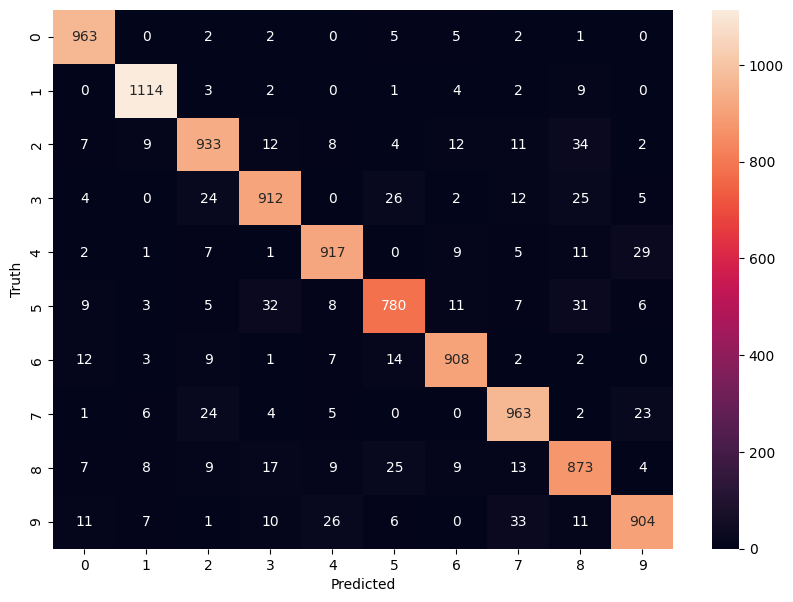

In [ ]:
#CONFUSION MATRIX VISUALIZATION

import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#CREATING SIMPLE NEURAL NETWORK WITH INPUT LAYER 784 NUERONS AND OUTPUT WITH 9 NEURONS && WITH HIDDEN LAYERS

#create a NN. stack 1 layer upon another.
#Dense means every neuron in layer "i" is connected to every other neuron in layer "j".
#here ip=784 neurons and op=10neurons
#100 neurons in hiddenlayer1

#flattening the input in the model before passing on to the layer

#building NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#compiling NN
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#training takes place here
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2716 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1232 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9838
